
<img src="http://www.nserc-crsng.gc.ca/_gui/wmms.gif" alt="Canada logo" align="right">

<br>

<img src="http://www.triumf.ca/sites/default/files/styles/gallery_large/public/images/nserc_crsng.gif?itok=H7AhTN_F" alt="NSERC logo" align="right" width = 90>



# Exploring NSERC Awards Data


Canada's [Open Government Portal](http://open.canada.ca/en) includes [NSERC Awards Data](http://open.canada.ca/data/en/dataset/c1b0f627-8c29-427c-ab73-33968ad9176e) from 1991 through 2016.

The awards data (in .csv format) were copied to an [Amazon Web Services S3 bucket](http://docs.aws.amazon.com/AmazonS3/latest/dev/UsingBucket.html). This open Jupyter notebook starts an exploration of the NSERC investment portfolio during the 1995 -- 2016 epoch. If you'd like access to the data hosted on S3, please contact [James Colliander](http://colliand.com).)

> **Acknowledgement:** I thank [Ian Allison](https://github.com/ianabc) and [James Colliander](http://colliand.com) of the [Pacific Institute for the Mathematical Sciences](http://www.pims.math.ca/) for building the [JupyterHub service](https://pims.jupyter.ca) and for help with this notebook. -- I. Heisz

## Variables you Can Modify

In [2]:
startYear = 1995
endYear   = 2017  # The end year is not included so write the last year you want + 1

committee = 1507 # enter the number (no strings) of the committee you want to explore, ex. 1508
# If you are unsure of what committees you can select see the "available committees" section in the code below

## Import the Data

In [3]:
import numpy as np
import pandas as pd
import sys

df = pd.DataFrame()

## Reads and processes the raw csv datafiles from NSERC, stored in Amazon s3.
for year in range(startYear, endYear):
    file = 'https://s3.ca-central-1.amazonaws.com/open-data-ro/NSERC/NSERC_GRT_FYR' + str(year) + '_AWARD.csv.gz'
    df = df.append(pd.read_csv(file, compression='gzip', usecols = [9, 11, 17, 28], encoding='latin-1'))
    
    # Prints the year name of each file that is processed.
    print(year)
    
## Rename columns for better readability.
df.columns = ['FiscalYear', 'AwardAmount', 'Committee', 'ResearchSubjectEN']  

1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


## Available Committees

In [4]:
availableCommittees = df.drop_duplicates(subset = 'Committee')
sortedCommittees = availableCommittees.sort_values(by=['Committee'], ascending=[True])
print(sortedCommittees.to_string(columns= ['Committee', 'ResearchSubjectEN'], index=False))

Committee                                  ResearchSubjectEN
        2                                           Genetics
        3                           Agricultural engineering
        4                              Polymers and coatings
        6                               Structural materials
        7                           Software and development
        8         Petrology, igneous and metamorphic geology
        9                                    Stable isotopes
       11                                   Electromagnetics
       12                              Biomedical technology
       13                               Offshore engineering
       14                            Nonparametric inference
       16                                      Combinatorics
       17                         Astronomy and astrophysics
       18                                Terrestrial ecology
       19                                      Not available
       20               

### Data for the Selected Committee
re-run this cell and all cells below this if you select a new committee

In [5]:
## Get the data for the chosen committee
fundingData = df.loc[(df['Committee'] == committee)]

# A sample of the data imported
fundingData.head()

,FiscalYear,AwardAmount,Committee,ResearchSubjectEN
1663,2009,111762,1507,Learning and inference theories
3479,2009,68703,1507,Information technology
6532,2009,121917,1507,Database management
6835,2009,43919,1507,Information technology
8057,2009,30000,1507,Computer systems software


## Total Awards Granted Per Year 
Note: Committee 1508 for Mathematics and Statistics was created in 2009 so there is no pre-2009 data on it.

In [10]:
# The sum of all awards for each individual year
awardSums = fundingData.groupby(['FiscalYear'])['AwardAmount'].transform('sum')

# Make a new column called 'TotalAward' to show the awardSums
awardTotalsByYear = fundingData.assign(TotalAward = awardSums)

# Count the number of awards given in each year
awardsGiven = awardTotalsByYear.groupby('FiscalYear').cumcount() + 1

# Make a new column called 'AwardCount' to show the awardsGiven  
awardTotalsByYear = awardTotalsByYear.assign(AwardCount=awardsGiven)

# Drop all but the last of duplicate years, now that we have the award amount info from them. 
# We keep the last one because that is where the final value of cumCount for the number of awards given is.
deduplicatedData = awardTotalsByYear.drop_duplicates(subset = 'FiscalYear', keep = 'last')

deduplicatedData[['FiscalYear','TotalAward', 'AwardCount']]

,FiscalYear,TotalAward,AwardCount
19612,2009,1131724,17
24161,2010,6011720,207
23277,2011,11272365,403
23587,2012,16811673,619
21814,2013,20918498,773
24237,2014,26043563,903
24501,2015,25038651,888
25096,2016,25826388,877


## Plots of the Data

In [11]:
## Imports necessary for plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

#Plotly for interactive plotting
!pip3 install plotly --user; 
import plotly.plotly as py
import plotly.graph_objs as go

### Plot of the Award Distribution for All Years

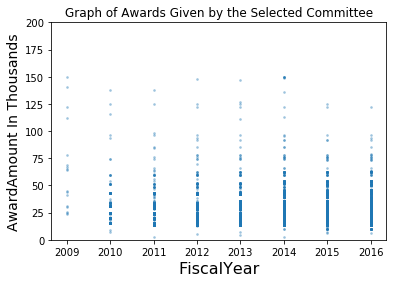

In [16]:
## Plot Settings, modifiable variables
data = fundingData

xAxis = 'FiscalYear'
yAxis = 'AwardAmount'

# This will probably need adjustment if you change years or committees
yAxisRange = [0,200]
yScalingFactor = 10**3
yScalingFactorString = ' In Thousands'

plotPointSizes = 3 

title = 'Graph of Awards Given by the Selected Committee'

## Make the Plot
axes = plt.gca()
x = data[xAxis]
plt.xlabel(xAxis, fontsize=16)

y = data[yAxis]
plt.ylabel(yAxis+yScalingFactorString, fontsize=14)
axes.set_ylim(yAxisRange)
y = y/yScalingFactor

plt.title(title)

plot = plt.scatter(x,y,s=plotPointSizes, alpha = 0.3)

plt.show()

### Plot of the Award Distribution for a Selected Year

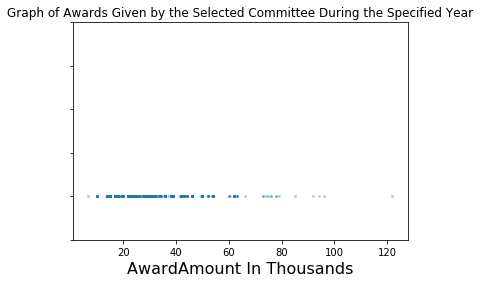

In [19]:
## Plot Settings, modifiable variables
year = 2016
data = fundingData.loc[(fundingData['FiscalYear'] == year)]

yAxis = 'FiscalYear'
xAxis = 'AwardAmount'

xScalingFactor = 10**3
xScalingFactorString = ' In Thousands'

# This will probably need adjustment if you change years or committees
yAxisRange = [0,10000]

plotPointSizes = 3 

title = 'Graph of Awards Given by the Selected Committee During the Specified Year'

## Make the Plot
axes = plt.gca()
x = data[xAxis]
x = x/xScalingFactor
plt.xlabel(xAxis+xScalingFactorString, fontsize=16)

y = data[yAxis]
axes.set_ylim(yAxisRange)
axes.set_yticklabels([]) # make it so the y axis is not numbered

plt.title(title)

plot = plt.scatter(x,y,s=plotPointSizes, alpha = 0.3)

plt.show()

(array([  1.,   0.,  13.,   0.,   0.,   1.,  35.,  50.,  21.,  50.,   7.,
         79.,   0.,  86.,  17.,  64.,  45.,   5.,  34.,  30.,  22.,  49.,
          5.,  20.,   2.,  42.,   1.,  21.,  19.,   1.,  17.,  17.,  10.,
          0.,  31.,   0.,   1.,  16.,   0.,   7.,   1.,  22.,   0.,   0.,
          0.,   0.,   4.,  12.,   4.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   2.,   1.,   1.,   2.,   2.,   1.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([   6.694  ,    7.84706,    9.00012,   10.15318,   11.30624,
          12.4593 ,   13.61236,   14.76542,   15.91848,   17.07154,
          18.2246 ,   19.37766,   20.53072,   21.68378,   22.83684,
          23.9899 ,   25.14296,   26.29602,   27.44908,   28.60214,
          29.7552 ,   30.90826,   32.06132,   

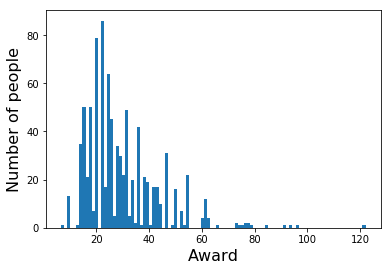

In [23]:
plt.ylabel("Number of people", fontsize=16)
plt.xlabel("Award", fontsize=16)
plt.hist(x, bins=100)